### DACON(데이콘) 데이콘 Basic 자동차 가격 예측 AI 경진대회

##### 중고차 블로그 워드 클라우드

In [ ]:
!pip install wordcloud

In [ ]:
!pip install konlpy

In [1]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt,Komoran
from PIL import Image
import numpy as np
import pandas as pd

In [4]:
blog_data = pd.read_csv('data//blog_des.csv',index_col=0)
blog_data.head()

,idx,title,body
0,0,"테슬라 중고차 가격, 미국에서 17% 하락... 이유가 뭘까",(출처: 로이터 통신)지난 27일(현지 시간) 로이터 통신(Reuters) 보도에 ...
1,1,현대 전기차 코나 일렉트릭 중고차 가격 하락은 없다,최근 코나 풀체인지 차량이 출시되었습니다.호불호는 있겠지만 디자인이 너무 잘 나왔더...
2,2,현대 전기차 코나 일렉트릭 중고차 가격 하락은 없다,최근 코나 풀체인지 차량이 출시되었습니다.호불호는 있겠지만 디자인이 너무 잘 나왔더...
3,3,교통사고 후 자동차 보험에서 보상하는 자동차(중고차) 시세하락손해(격락손해),광주 양산동한방병원 상담전화광주 첨단 교통사고 한방병원교통사고로 첨단 제이한방병원에...
4,4,중고차 가격 하락 시작??,오늘자 자동차 관련 기사들 가운에 눈에 띄는 것 가운데 하나가 바로 중고차 가격이 ...


In [5]:
data = blog_data['title'].values + blog_data['body'].values

In [6]:
data = list(data)

In [7]:
data = data[11:]

8
31
165
201
213
245
267
283
288
289
295
313
316
370
382
414
415
520


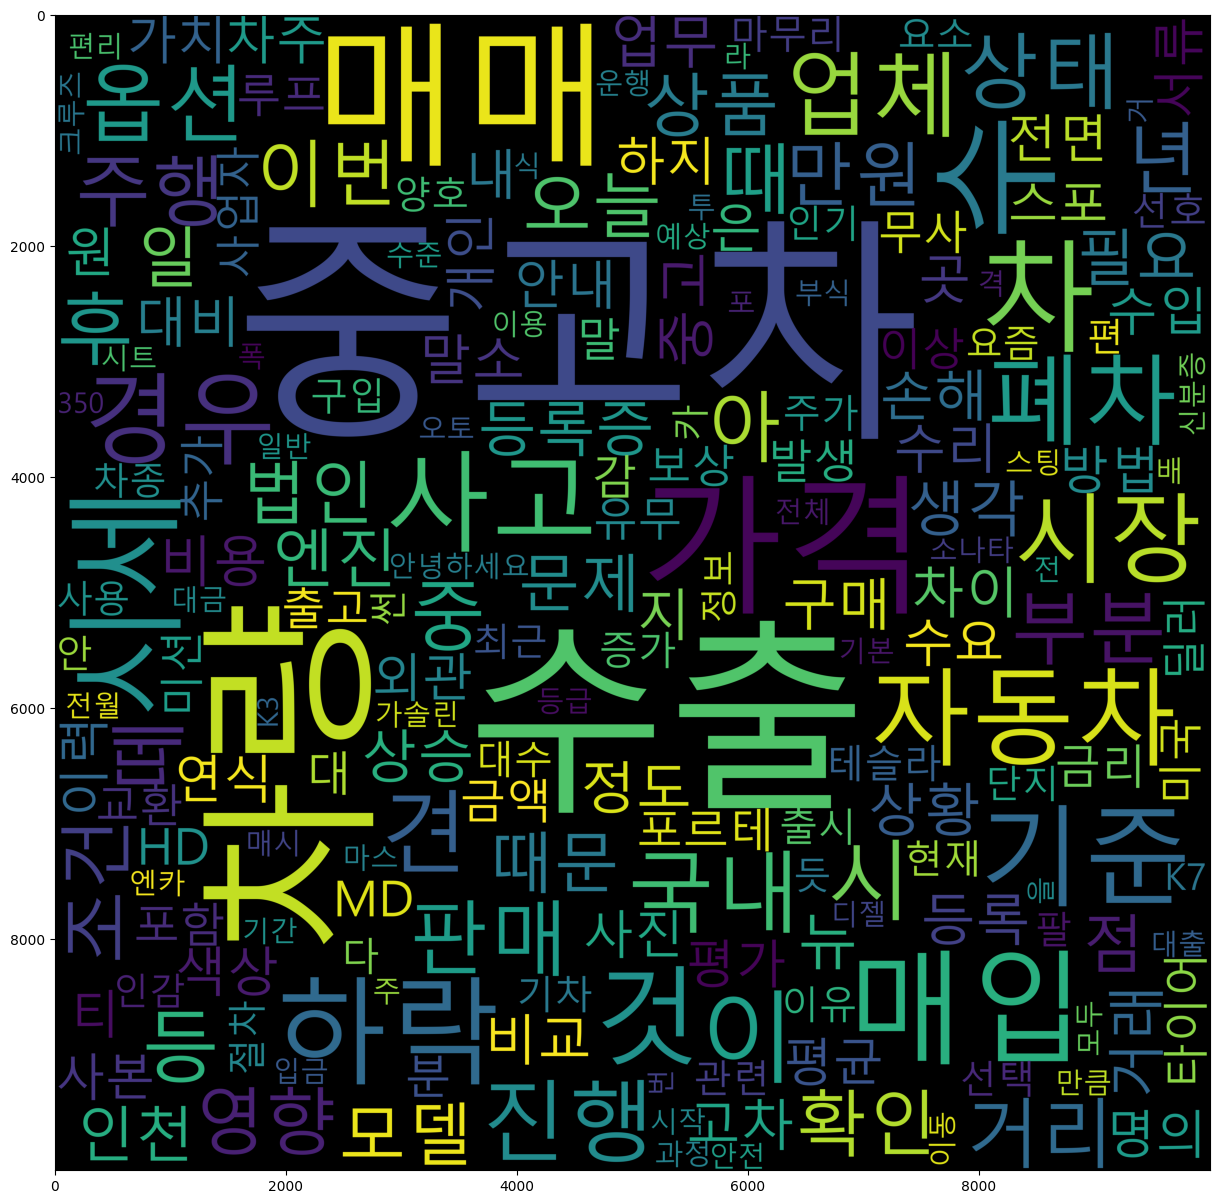

In [8]:
words = []
komoran = Komoran()
for idx,title_body in enumerate(data):
    try:
        nouns = komoran.nouns(title_body)
        words.extend(nouns)
    except:
        print(idx)
        pass

wCloud = Counter(words)

wc = WordCloud(font_path='malgun', width=2000, height=2000, scale=5.0, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)

In [9]:
wCloud.most_common() , len(wCloud.most_common())

([('중고차', 9422),
  ('수출', 6966),
  ('차량', 5529),
  ('매매', 3709),
  ('가격', 3480),
  ('수', 2676),
  ('매입', 2308),
  ('차', 2220),
  ('시세', 2192),
  ('하락', 2041),
  ('기준', 1815),
  ('것', 1795),
  ('사고', 1788),
  ('자동차', 1668),
  ('이', 1509),
  ('경우', 1479),
  ('폐차', 1443),
  ('시장', 1433),
  ('견', 1271),
  ('업체', 1269),
  ('진행', 1212),
  ('국내', 1191),
  ('시', 1136),
  ('옵션', 1082),
  ('상태', 1026),
  ('판매', 1015),
  ('후', 950),
  ('등', 946),
  ('부분', 940),
  ('년', 920),
  ('주행', 885),
  ('아', 882),
  ('떼', 878),
  ('중', 877),
  ('때', 867),
  ('거리', 858),
  ('조건', 847),
  ('영향', 812),
  ('이번', 794),
  ('확인', 785),
  ('오늘', 762),
  ('만원', 753),
  ('법인', 730),
  ('상품', 727),
  ('모델', 710),
  ('일', 660),
  ('때문', 659),
  ('엔진', 621),
  ('점', 612),
  ('문제', 592),
  ('필요', 566),
  ('인천', 559),
  ('뉴', 557),
  ('생각', 544),
  ('등록증', 532),
  ('중고', 523),
  ('거래', 503),
  ('상황', 495),
  ('상승', 490),
  ('정도', 477),
  ('업무', 472),
  ('등록', 459),
  ('구매', 455),
  ('지', 453),
  ('고차', 441),
  ('비용', 438)

In [10]:
wCloud.most_common()[:30]

[('중고차', 9422),
 ('수출', 6966),
 ('차량', 5529),
 ('매매', 3709),
 ('가격', 3480),
 ('수', 2676),
 ('매입', 2308),
 ('차', 2220),
 ('시세', 2192),
 ('하락', 2041),
 ('기준', 1815),
 ('것', 1795),
 ('사고', 1788),
 ('자동차', 1668),
 ('이', 1509),
 ('경우', 1479),
 ('폐차', 1443),
 ('시장', 1433),
 ('견', 1271),
 ('업체', 1269),
 ('진행', 1212),
 ('국내', 1191),
 ('시', 1136),
 ('옵션', 1082),
 ('상태', 1026),
 ('판매', 1015),
 ('후', 950),
 ('등', 946),
 ('부분', 940),
 ('년', 920)]

##### 단어 제외후 Wordcloud 재생성(1)

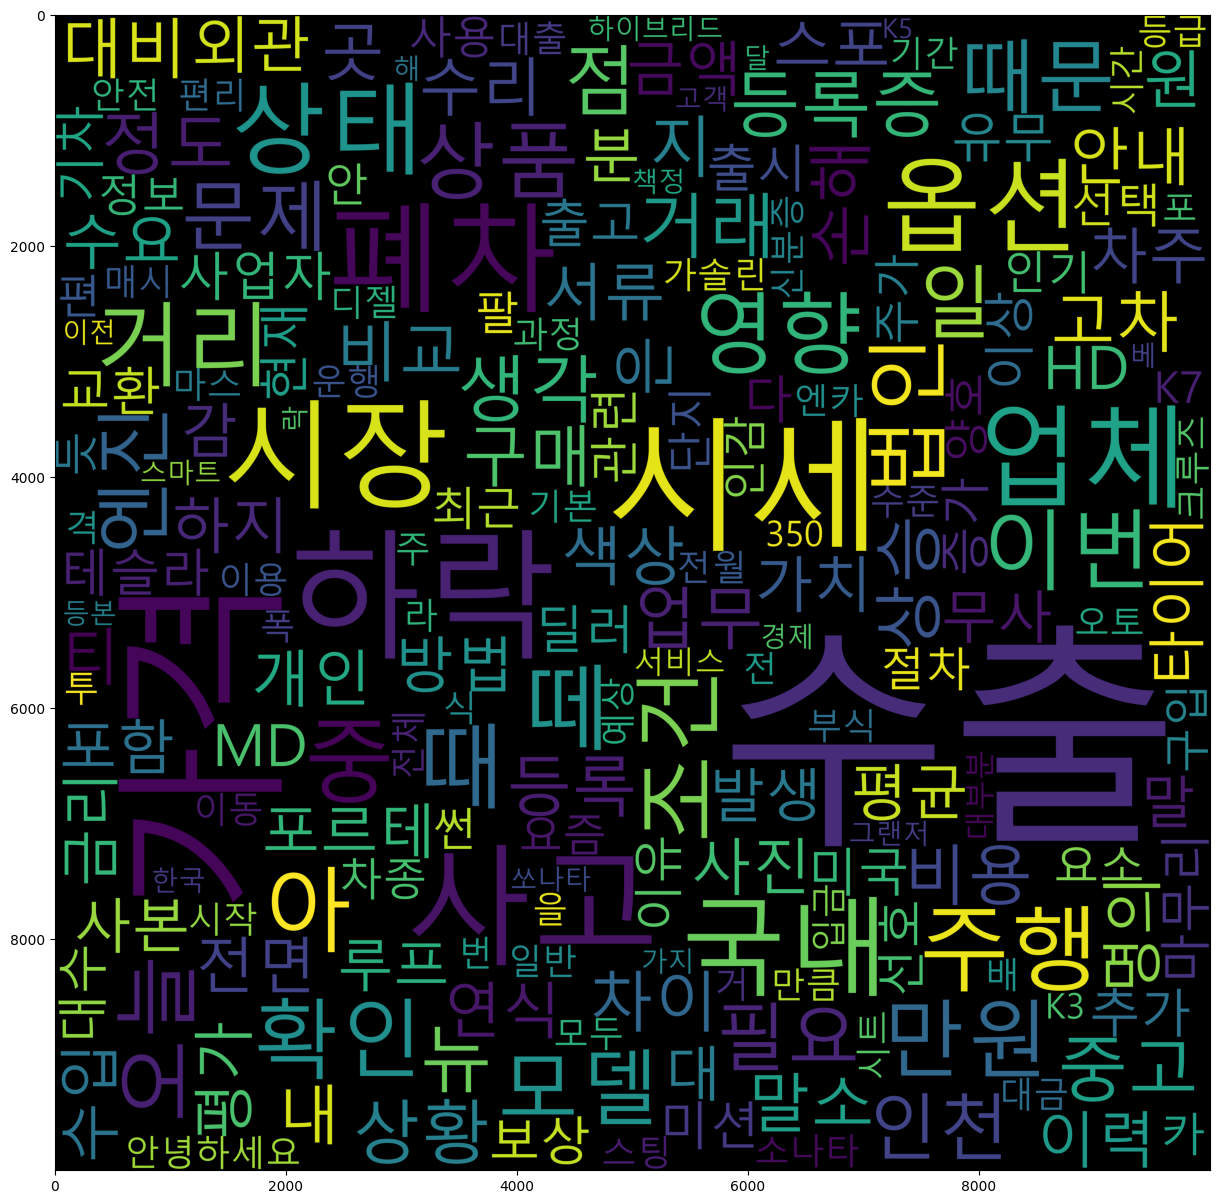

In [11]:
del_words = ['중고차','차량','매매','수','매입','차','기준','것','자동차','이','경우','견','진행','시','판매','후','등','부분','년']

for del_word in del_words:
    del wCloud[del_word]

wc = WordCloud(font_path='malgun', width=2000, height=2000, scale=5.0, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)

In [12]:
wCloud.most_common()[:30]

[('수출', 6966),
 ('가격', 3480),
 ('시세', 2192),
 ('하락', 2041),
 ('사고', 1788),
 ('폐차', 1443),
 ('시장', 1433),
 ('업체', 1269),
 ('국내', 1191),
 ('옵션', 1082),
 ('상태', 1026),
 ('주행', 885),
 ('아', 882),
 ('떼', 878),
 ('중', 877),
 ('때', 867),
 ('거리', 858),
 ('조건', 847),
 ('영향', 812),
 ('이번', 794),
 ('확인', 785),
 ('오늘', 762),
 ('만원', 753),
 ('법인', 730),
 ('상품', 727),
 ('모델', 710),
 ('일', 660),
 ('때문', 659),
 ('엔진', 621),
 ('점', 612)]

##### 단어 제외후 Wordcloud 재생성(2)

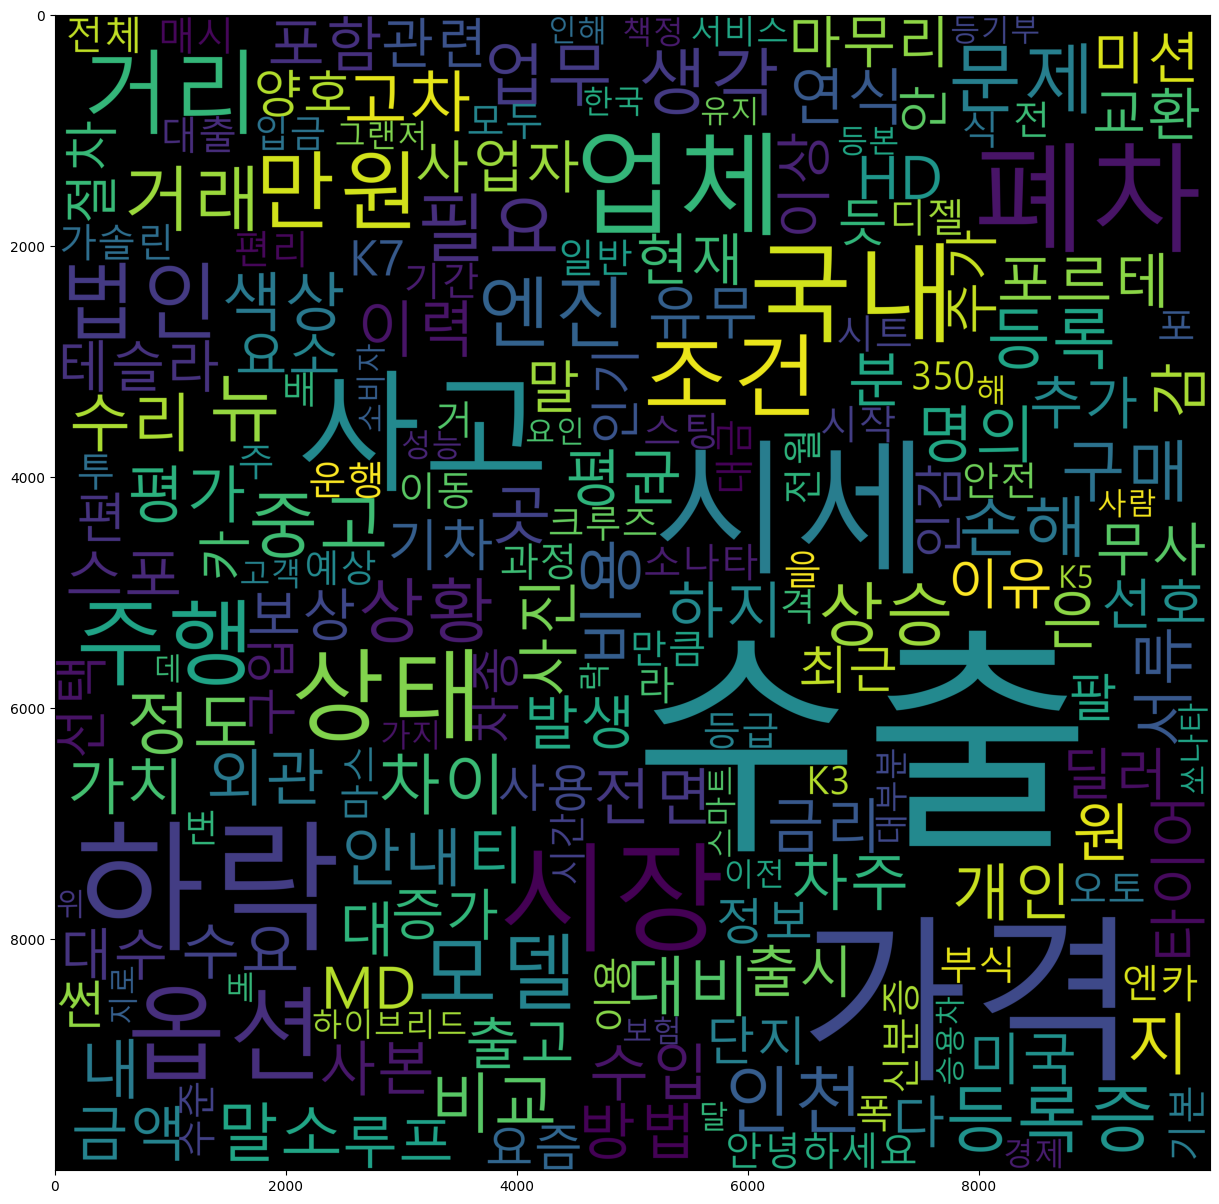

In [13]:
del_words = ['아','떼','중','때','영향','이번','확인','오늘','상품','일','때문','점']

for del_word in del_words:
    del wCloud[del_word]

wc = WordCloud(font_path='malgun', width=2000, height=2000, scale=5.0, max_font_size=400)
gen = wc.generate_from_frequencies(wCloud)
plt.figure(figsize=(15,15))
plt.imshow(gen)

In [15]:
wCloud.most_common()[:20]

[('수출', 6966),
 ('가격', 3480),
 ('시세', 2192),
 ('하락', 2041),
 ('사고', 1788),
 ('폐차', 1443),
 ('시장', 1433),
 ('업체', 1269),
 ('국내', 1191),
 ('옵션', 1082),
 ('상태', 1026),
 ('주행', 885),
 ('거리', 858),
 ('조건', 847),
 ('만원', 753),
 ('법인', 730),
 ('모델', 710),
 ('엔진', 621),
 ('문제', 592),
 ('필요', 566)]

##### 검색 키워드 '증고차 하락'으로 변경 후 WordCloud